In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, 
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import requests
from sklearn import preprocessing
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns

In [ ]:
url = "https://sykathowlader.github.io/visualization_data/diabetes.csv"

df1 = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe
     

In [3]:

url = "https://sykathowlader.github.io/visualization_data/diabetes.csv"

df1 = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe
df1.head()

# Shuffle the DataFrame rows
df1 = df1.reindex(np.random.permutation(df1.index))

# Display the shape of the data
print(df1.head())

        Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
125813           0.0     1.0       0.0        1.0  33.0     1.0     0.0   
196572           0.0     0.0       1.0        1.0  27.0     0.0     0.0   
112336           0.0     1.0       0.0        1.0  33.0     0.0     0.0   
9419             2.0     0.0       0.0        1.0  28.0     0.0     0.0   
190989           0.0     0.0       0.0        1.0  24.0     1.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
125813                   1.0           1.0     0.0  ...            1.0   
196572                   0.0           1.0     1.0  ...            0.0   
112336                   0.0           1.0     1.0  ...            1.0   
9419                     0.0           1.0     0.0  ...            1.0   
190989                   0.0           1.0     1.0  ...            1.0   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
125813          0.0      5.0   

In [4]:
# Splitting the dataset into training and testing sets
y = df1['Diabetes_012']
X = df1.drop('Diabetes_012', axis=1)
print (X.shape)
print (y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(df1.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Initialize the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the first few rows of the scaled training data
print(X_train_scaled[:2])

(253680, 21)
(253680,)
(253680, 22)
(202944, 21)
(50736, 21)
(202944,)
(50736,)
[[-0.86573793 -0.85755158  0.19596104  0.54726325  1.1204282  -0.20487264
  -0.32312391  0.56829163 -1.31619502  0.4828146  -0.24440156  0.22729934
  -0.30431308 -0.47913589  0.24317866 -0.48647443 -0.45044643 -0.88533013
  -1.3208902   0.96363871  0.93938182]
 [ 1.15508397  1.16611061  0.19596104 -0.35985882  1.1204282  -0.20487264
  -0.32312391 -1.75965993  0.75976583  0.4828146  -0.24440156  0.22729934
  -0.30431308 -0.47913589 -0.02620734  2.26492115 -0.45044643 -0.88533013
   0.64295192 -1.06608292 -0.50753868]]


Accuracy: 0.77
Confusion matrix:
[[36604   901  5170]
 [  682    26   216]
 [ 4581   298  2258]]


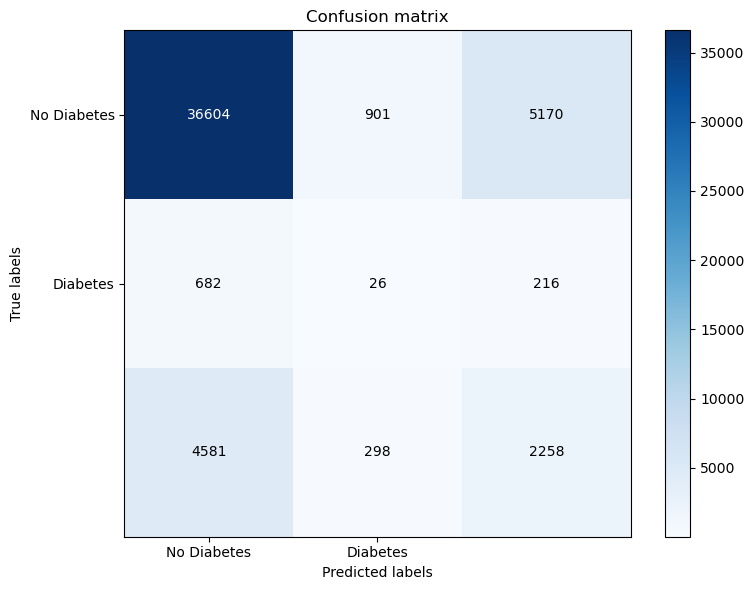

In [12]:
# Train a DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train_scaled, y_train)

# Predict the testing set
y_pred = classifier.predict(X_test_scaled)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % accuracy)

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(cm)

# Plot the confusion matrix 
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.yticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.tight_layout()

# Add values into the confusion matrix 
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.show()
